## Group 2 - Swire Capstone

### Group Members  
Harichandana Gonuguntla  
Pavani Pragada  
Joshua Hawley


### Table of Contents

1. [Business Problem Statement](#busprob)
2. [Data Preparation](#prepwork)
3. [Exploratory Data Analysis](#eda)
    1. [Detecting and Dealing with Nulls](#nulls)
    2. [Determining Outlier Data](#outliers)
    3. [Visualizations](#visualizations)
4. [Modeling](#modeling)
    1. [XGBoost](#xgboost)

### Swire Coca-Cola Business Problem Statement <a id='busprob'></a>

1. **Business Problem:**
The primary problem Swire Coca-Cola faces is the challenge of accurately forecasting weekly demand for its innovative beverage products. This forecasting is crucial to avoid stockouts and minimize production overruns. 
The uniqueness of the products, combined with varying factors like flavor, caloric segment, packaging, seasonality, and emerging trends, adds complexity to demand forecasting.


2. **Benefit of a Solution:**
Implementing a precise forecast model will enable Swire Coca-Cola to optimize production quantities, thereby minimizing costs and enhancing customer satisfaction. 
A successful solution will help the company manage inventory efficiently, reducing surplus and ensuring that innovative products are available at ideal locations and to targeted demographics, contributing to sustained growth and operational excellence in the competitive beverage industry.


3. **Success Metrics:**
The success of the forecast model will be evaluated based on its accuracy in predicting demand, its impact on minimizing costs, and enhancing customer satisfaction. 
Performance metrics will be used to assess the models, with the best model chosen based on these results. 
The effectiveness in enabling Swire to make strategic decisions regarding inventory management and product placement will also be a critical measure of success.


4. **Analytics Approach:**
The analytics approach involves developing a forecast model that integrates various factors like flavor, caloric content, packaging, seasonality, and market trends. 
This model leverages historical data of similar products to predict the demand for new flavors at specific locations within a 13-week range. 
The approach may also include evaluating additional market factors for a deeper understanding of sales data, ensuring a comprehensive analysis for accurate forecasting.


5. **Project Scope:**
The project will deliver a forecast model developed and tested within a 2-month period, ready for client presentation and implementation. 
The initial scope includes developing the model to forecast demand based on specified factors, with the possibility of integrating additional market factors for enhanced insights. 
Aspects out of scope could include real-time adjustments to the model post-deployment, which might be considered for future enhancements.


6. **Project Details:**
The analytics team is responsible for executing the project, with a timeline set to finish the model development and testing within 2 months. 
Important milestones include the completion of the initial model, the integration of initial testing feedback, and the final evaluation of the model against performance metrics. 
The project culminates in the delivery and presentation of the forecast model to Swire Coca-Cola, ensuring they are equipped with a powerful tool for strategic decision-making in product distribution and inventory management.





## Data and Notebook Preparation <a id='prepwork'></a>

In [1]:
import importlib
import subprocess
import sys

def import_or_install(package, alias=None):
    try:
        module = importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        module = importlib.import_module(package)
    
    if alias is not None:
        globals()[alias] = module
    else:
        globals()[package] = module

    return module

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# setting figure size for the notebook
sns.set(rc={'figure.figsize':(15,6)})

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# demoDF = pd.read_excel('consumer_demographics.xlsx')
demoDF = pd.read_excel('consumer_demographics.xlsx', sheet_name='Data')

demoDF.head(10)

,Geography Name,Zip,City,State,Segment,Criteria,Count,Criteria_Unit
0,"85281 Tempe, AZ",85281,Tempe,AZ,Household Income,"Income Under $10,000",3628,HHs
1,"85705 Tucson, AZ",85705,Tucson,AZ,Household Income,"Income Under $10,000",3299,HHs
2,"85364 Yuma, AZ",85364,Yuma,AZ,Household Income,"Income Under $10,000",2852,HHs
3,"85301 Glendale, AZ",85301,Glendale,AZ,Household Income,"Income Under $10,000",2425,HHs
4,"85719 Tucson, AZ",85719,Tucson,AZ,Household Income,"Income Under $10,000",2305,HHs
5,"85716 Tucson, AZ",85716,Tucson,AZ,Household Income,"Income Under $10,000",1811,HHs
6,"86505 Ganado, AZ",86505,Ganado,AZ,Household Income,"Income Under $10,000",1736,HHs
7,"85710 Tucson, AZ",85710,Tucson,AZ,Household Income,"Income Under $10,000",1582,HHs
8,"85706 Tucson, AZ",85706,Tucson,AZ,Household Income,"Income Under $10,000",1500,HHs
9,"85009 Phoenix, AZ",85009,Phoenix,AZ,Household Income,"Income Under $10,000",1478,HHs


In [4]:
demoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491400 entries, 0 to 491399
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Geography Name  491400 non-null  object
 1   Zip             491400 non-null  int64 
 2   City            491400 non-null  object
 3   State           491400 non-null  object
 4   Segment         491400 non-null  object
 5   Criteria        491400 non-null  object
 6   Count           491400 non-null  int64 
 7   Criteria_Unit   491400 non-null  object
dtypes: int64(2), object(6)
memory usage: 30.0+ MB


In [5]:
# get all unique values in the 'State' column
unique_states = demoDF['State'].unique()

# print the unique states
for state in unique_states:
    print(state)

AZ
CA
CO
ID
KS
NE
NM
NV
OR
SD
UT
WA
WY


In [6]:
print('Shape of the demographic file:', demoDF.shape)

Shape of the demographic file: (491400, 8)


In [7]:
# reading in the parquet file
parquetDF = pd.read_parquet('FACT_MARKET_DEMAND.parquet')

In [8]:
# looking at the shape of the file
print("Shape of the Parquet file:", parquetDF.shape)

Shape of the Parquet file: (24461424, 10)


In [9]:
parquetDF.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...


In [10]:
# Convert the 'DATE' column to datetime
parquetDF['DATE'] = pd.to_datetime(parquetDF['DATE'], format='%Y-%m-%d')

# Check the DataFrame info again to confirm the change
parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461424 entries, 0 to 24461423
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DATE             datetime64[ns]
 1   MARKET_KEY       int64         
 2   CALORIC_SEGMENT  object        
 3   CATEGORY         object        
 4   UNIT_SALES       float64       
 5   DOLLAR_SALES     float64       
 6   MANUFACTURER     object        
 7   BRAND            object        
 8   PACKAGE          object        
 9   ITEM             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.8+ GB


In [11]:
zipmap = pd.read_csv('zip_to_market_unit_mapping.csv')

zipmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ZIP_CODE    2382 non-null   int64
 1   MARKET_KEY  2382 non-null   int64
dtypes: int64(2)
memory usage: 37.3 KB


In [12]:
# adding state column to zipmap
# merge the dataframes on the 'Zip'/'ZIP_CODE' column
zipmap_st = zipmap.merge(demoDF[['Zip', 'State']], left_on='ZIP_CODE', right_on='Zip', how='left')

# drop the redundant 'Zip' column
zipmap_st = zipmap_st.drop(columns='Zip')

In [13]:
zipmap_st.head(10)

,ZIP_CODE,MARKET_KEY,State
0,57714,161,SD
1,57714,161,SD
2,57714,161,SD
3,57714,161,SD
4,57714,161,SD
5,57714,161,SD
6,57714,161,SD
7,57714,161,SD
8,57714,161,SD
9,57714,161,SD


In [14]:
brand_value_counts = parquetDF['BRAND'].value_counts()

display(brand_value_counts)

BRAND
CROWN                                  1239010
REAL-TIME EDITIONS                      827868
DIGRESS FLAVORED                        731199
MYTHICAL BEVERAGE ULTRA                 718536
BUBBLE JOY                              535030
                                        ...   
PAPI VANILLA REAL SUGAR                      1
LAUGHING MYTHICAL BEVERAGE CHAI HAI          1
TIPCAL CANARY TWISTER SODA                   1
MIST TWST NAT CBRY                           1
VAULTLESS                                    1
Name: count, Length: 319, dtype: int64

In [15]:
min_date = parquetDF['DATE'].min()
max_date = parquetDF['DATE'].max()

print("Minimum Date: ", min_date)
print("Maximum Date: ", max_date)

Minimum Date:  2020-12-05 00:00:00
Maximum Date:  2023-10-28 00:00:00


## Exploratory Data Analysis <a id='eda'></a>

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

parquetDF.describe()

,DATE,MARKET_KEY,UNIT_SALES,DOLLAR_SALES
count,24461424,24461424.00,24461424.00,24461424.00
mean,2022-04-25 16:08:55.221432320,593.14,174.37,591.14
min,2020-12-05 00:00:00,1.00,0.04,0.01
25%,2021-08-14 00:00:00,260.00,11.00,36.59
50%,2022-04-23 00:00:00,547.00,40.00,135.05
75%,2022-12-31 00:00:00,845.00,126.00,427.14
max,2023-10-28 00:00:00,6802.00,96776.00,492591.07
std,NaN,605.88,857.81,3040.54


In [17]:
min_unit_sales_index = parquetDF['UNIT_SALES'].idxmin()
min_unit_sales_row = parquetDF.loc[min_unit_sales_index]

min_unit_sales_row

DATE                                             2023-10-14 00:00:00
MARKET_KEY                                                       484
CALORIC_SEGMENT                                           DIET/LIGHT
CATEGORY                                                      ENERGY
UNIT_SALES                                                      0.04
DOLLAR_SALES                                                    2.00
MANUFACTURER                                                   ALLYS
BRAND                                                 REAL-TIME ZERO
PACKAGE                                             8SMALL 24ONE CUP
ITEM               REAL-TIME ZERO ENERGY DRINK UNFLAVORED ZERO SU...
Name: 25460, dtype: object

In [18]:
max_unit_sales_index = parquetDF['UNIT_SALES'].idxmax()
max_unit_sales_row = parquetDF.loc[max_unit_sales_index]

max_unit_sales_row

DATE                                             2021-01-02 00:00:00
MARKET_KEY                                                      1172
CALORIC_SEGMENT                                              REGULAR
CATEGORY                                                         SSD
UNIT_SALES                                                  96776.00
DOLLAR_SALES                                               129319.10
MANUFACTURER                                                SWIRE-CC
BRAND                                                          PEPPY
PACKAGE                                                 2L MULTI JUG
ITEM               PEPPY GENTLE DRINK RED  PEPPER COLA JUG 67.6 L...
Name: 14714942, dtype: object

In [19]:
print('Number of duplicate rows: ', parquetDF.duplicated().sum())

Number of duplicate rows:  0


### Detecting and Dealing with Nulls <a id='nulls'></a>

In [20]:
print(parquetDF.isnull().sum())

DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
dtype: int64


In [21]:
# calculating percentage of null rows
null_percentage = (parquetDF['CALORIC_SEGMENT'].isnull().sum() / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(null_percentage)

print('The percentage of rows with null CALORIC_SEGMENT:', formatted_percentage)


The percentage of rows with null CALORIC_SEGMENT: 0.24%


There may not be a reason to remove those rows that have nulls in CALORIC_SEGMENT. There are still plenty of data points that are valid and I am afraid it may skew our modeling results.

In [22]:
# looking at the head of the null caloric_segment columns
parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()].head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
603,2022-04-09,197,None,SSD,82.00,256.09,JOLLYS,PAPI WILD CHERRY,7.5SMALL MLT CUP,PAPI GENTLE DRINK WILD RED COLA CUP 7.5 LIQUI...
1529,2020-12-05,413,None,SSD,93.00,184.78,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL
1587,2022-08-27,87,None,SSD,54.00,112.16,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL
1601,2022-05-21,969,None,SSD,40.00,133.92,JOLLYS,PAPI WILD CHERRY,7.5SMALL MLT CUP,PAPI GENTLE DRINK WILD RED COLA CUP 7.5 LIQUI...
1856,2021-01-02,530,None,SSD,7.00,14.71,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL


In [23]:
# check to see the manaufacturer on the nulls

# filter the DataFrame for rows where 'CALORIC_SEGMENT' is null
nulls = parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()]

# group by 'MANUFACTURER' and count the number of nulls
nulls_by_manufacturer = nulls['MANUFACTURER'].value_counts()

print(nulls_by_manufacturer)

MANUFACTURER
JOLLYS      59335
COCOS         379
ALLYS           8
SWIRE-CC        3
Name: count, dtype: int64


In [24]:
# dropping nulls
# parquetDF = parquetDF.dropna(subset=['CALORIC_SEGMENT'])

### Determining Outliers <a id='outliers'></a>

In [25]:
# checking for obvious outliers
from scipy import stats

# selecting 'MARKET_SALES' and 'UNIT_SALES' columns
selected_columns = parquetDF[['DOLLAR_SALES', 'UNIT_SALES']]

# calculating z-scores
z_scores = stats.zscore(selected_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=selected_columns.columns)

# calculating count of rows with z-score > 3 for each column
outlier_counts = (z_scores_df > 3).sum()

print('The count of rows with Z-score > 3 for each selected column:')
print(outlier_counts)

The count of rows with Z-score > 3 for each selected column:
DOLLAR_SALES    144906
UNIT_SALES      160380
dtype: int64


In [26]:
# selecting only numeric columns
numeric_columns = parquetDF.select_dtypes(include=[np.number])

# calculating z-scores
z_scores = stats.zscore(numeric_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

# creating a boolean DataFrame where True indicates that the z-score > 3
outlier_mask = (z_scores_df > 3)

# finding rows that contain more than one outlier
outlier_rows = parquetDF[outlier_mask.sum(axis=1) > 1]

print('Rows that contain more than one outlier:')
display(outlier_rows)

Rows that contain more than one outlier:


,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
26,2020-12-19,952,REGULAR,ENERGY,9515.00,19836.89,PONYS,MYTHICAL BEVERAGE,16SMALL MULTI CUP,MYTHICAL BEVERAGE ENERGY DRINK UNFLAVORED CUP ...
62,2022-02-19,926,REGULAR,SSD,3099.00,14461.00,JOLLYS,PAPI,12SMALL 12ONE CUP,PAPI GENTLE DRINK COLA CUP 12 LIQUID SMALL X12
257,2021-11-06,980,REGULAR,SSD,6601.00,13747.73,COCOS,BUBBLE JOY ADVANTAGEOUS,20SMALL MULTI JUG,KOOL! GENTLE DRINK COLA JUG 20 LIQUID SMALL
324,2021-11-06,1811,REGULAR,SSD,3269.00,9930.01,JOLLYS,PAPI,7.5SMALL 6ONE CUP,PAPI GENTLE DRINK COLA CUP 7.5 LIQUID SMALL X6
484,2022-05-21,442,DIET/LIGHT,ENERGY,4837.00,11379.86,JORDYS,POW-POW,16SMALL MULTI CUP,POW-POW DIETARY HEALTH SUPPLEMENT LIQUID POTEN...
...,...,...,...,...,...,...,...,...,...,...
24459153,2022-11-26,953,REGULAR,SSD,7272.00,30927.74,COCOS,BUBBLE JOY ADVANTAGEOUS,12SMALL 12ONE CUP,KOOL! GENTLE DRINK COLA CUP 12 LIQUID SMALL X12
24460102,2021-12-11,6802,DIET/LIGHT,SSD,4174.00,8436.87,JOLLYS,DIET PAPI,20SMALL MULTI JUG,DIET PAPI GENTLE DRINK COLA DIET JUG 20 LIQUID...
24461025,2022-05-07,977,REGULAR,ENERGY,7008.00,19956.53,ALLYS,REAL-TIME,12SMALL MULTI CUP,REAL-TIME ENERGY DRINK UNFLAVORED CUP 12 LIQUI...
24461148,2022-09-10,441,REGULAR,ENERGY,5602.00,15987.67,ALLYS,REAL-TIME,12SMALL MULTI CUP,REAL-TIME ENERGY DRINK UNFLAVORED CUP 12 LIQUI...


In [27]:
# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in both UNIT_SALES and DOLLAR_SALES:', formatted_percentage)

The percentage of rows with outliers in both UNIT_SALES and DOLLAR_SALES: 0.41%


In [28]:
# finding rows that contain outliers in either 'UNIT_SALES' or 'DOLLAR_SALES', but not both
outlier_rows = parquetDF[outlier_mask.sum(axis=1) == 1]

# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in either UNIT_SALES or DOLLAR_SALES, but not both:', formatted_percentage)

The percentage of rows with outliers in either UNIT_SALES or DOLLAR_SALES, but not both: 1.07%


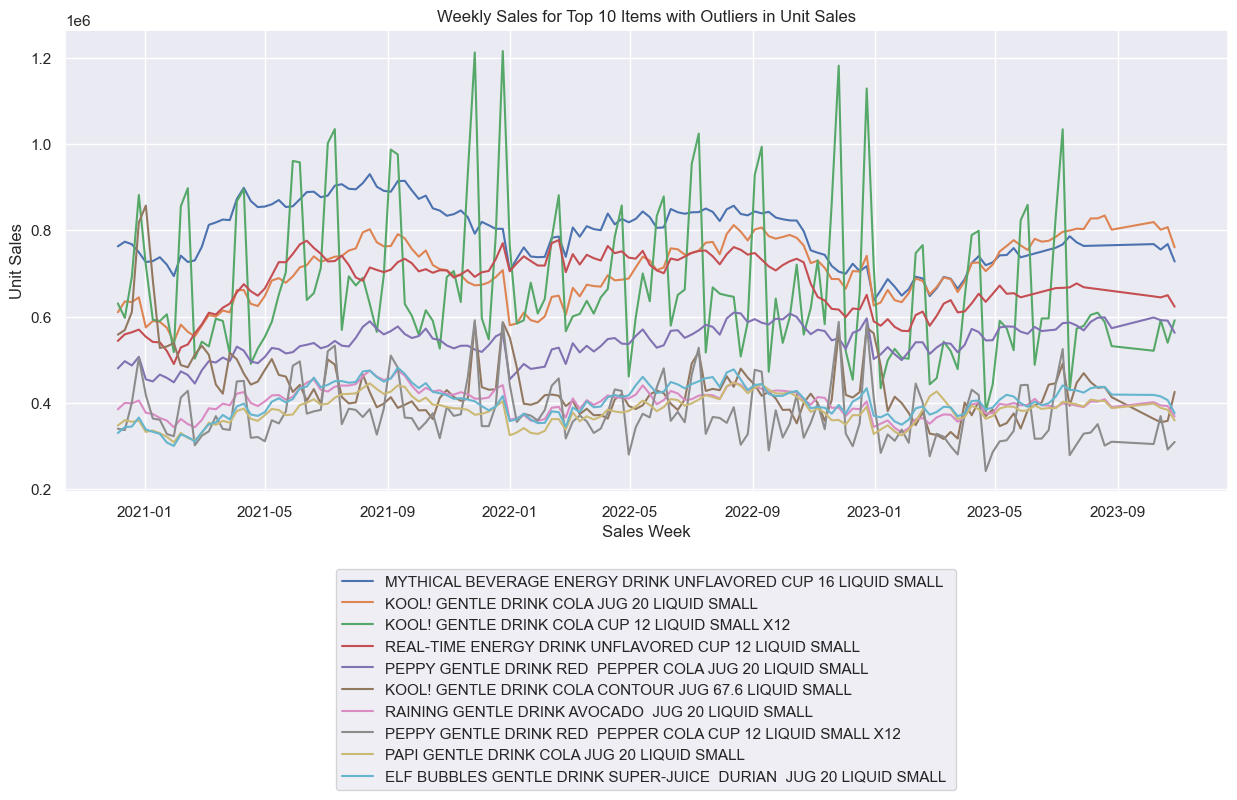

In [29]:
# re-calculate z-scores for 'UNIT_SALES'
parquetDF['z_scores'] = stats.zscore(parquetDF['UNIT_SALES'])

# filter the DataFrame to include only rows with outliers in 'UNIT_SALES'
outliers_df = parquetDF[parquetDF['z_scores'].abs() > 3]

# group by 'ITEM' and sum 'UNIT_SALES' for outliers
outlier_item_sales = outliers_df.groupby('ITEM')['UNIT_SALES'].sum()

# find the top 10 items by sales among outliers
top_10_outlier_items = outlier_item_sales.nlargest(10)

# filter the original DataFrame to include only the top 10 items with outliers
top_10_items_data = parquetDF[parquetDF['ITEM'].isin(top_10_outlier_items.index)]

# group by 'DATE' and 'ITEM', and sum 'UNIT_SALES' for the top 10 items
weekly_sales = top_10_items_data.groupby(['DATE', 'ITEM'])['UNIT_SALES'].sum().reset_index()

# plot the weekly sales for each of the top 10 items
for item in top_10_outlier_items.index:
    item_data = weekly_sales[weekly_sales['ITEM'] == item]
    plt.plot(item_data['DATE'], item_data['UNIT_SALES'], label=item)

plt.xlabel('Sales Week')
plt.ylabel('Unit Sales')
plt.title('Weekly Sales for Top 10 Items with Outliers in Unit Sales')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
plt.grid(True)
plt.show()

**MY FEELING IS THAT THESE OUTLIERS ARE MORE AN INDICATION OF PROMOTIONAL EVENTS OR PRODUCT LAUNCHES THAN A PROBLEM IN THE DATA. WE SHOULD KEEP THEM IN THE DATAFRAME**

### Visualizations <a id='visualizations'></a>

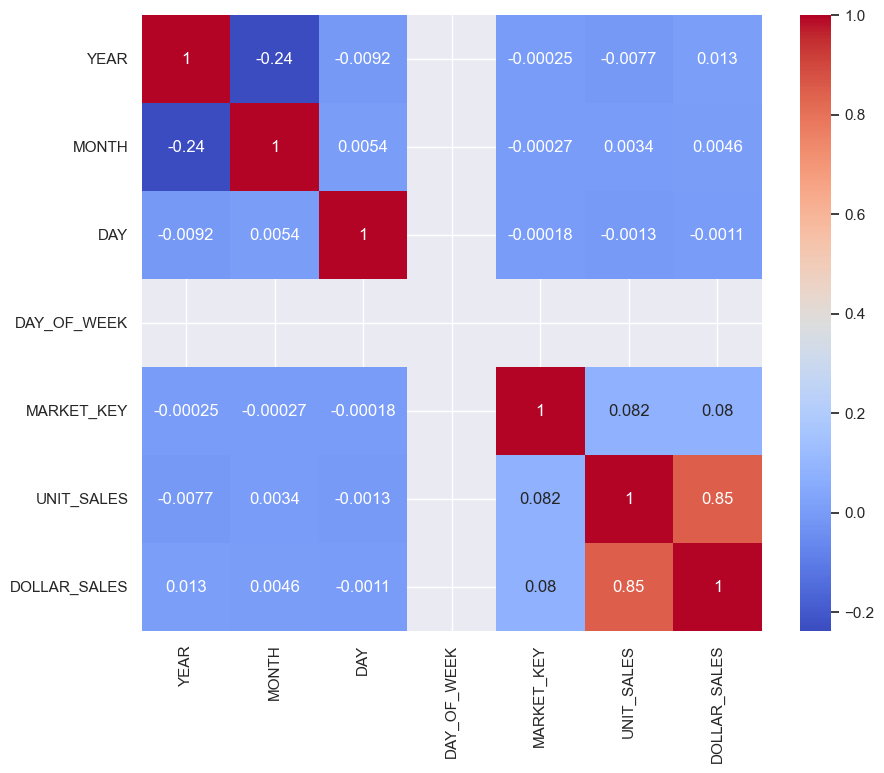

In [30]:
# Create new features from 'DATE'
parquetDF['YEAR'] = parquetDF['DATE'].dt.year
parquetDF['MONTH'] = parquetDF['DATE'].dt.month
parquetDF['DAY'] = parquetDF['DATE'].dt.day
parquetDF['DAY_OF_WEEK'] = parquetDF['DATE'].dt.dayofweek

# Calculate the correlation matrix
correlation_matrix = parquetDF[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'MARKET_KEY', 'UNIT_SALES', 'DOLLAR_SALES']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

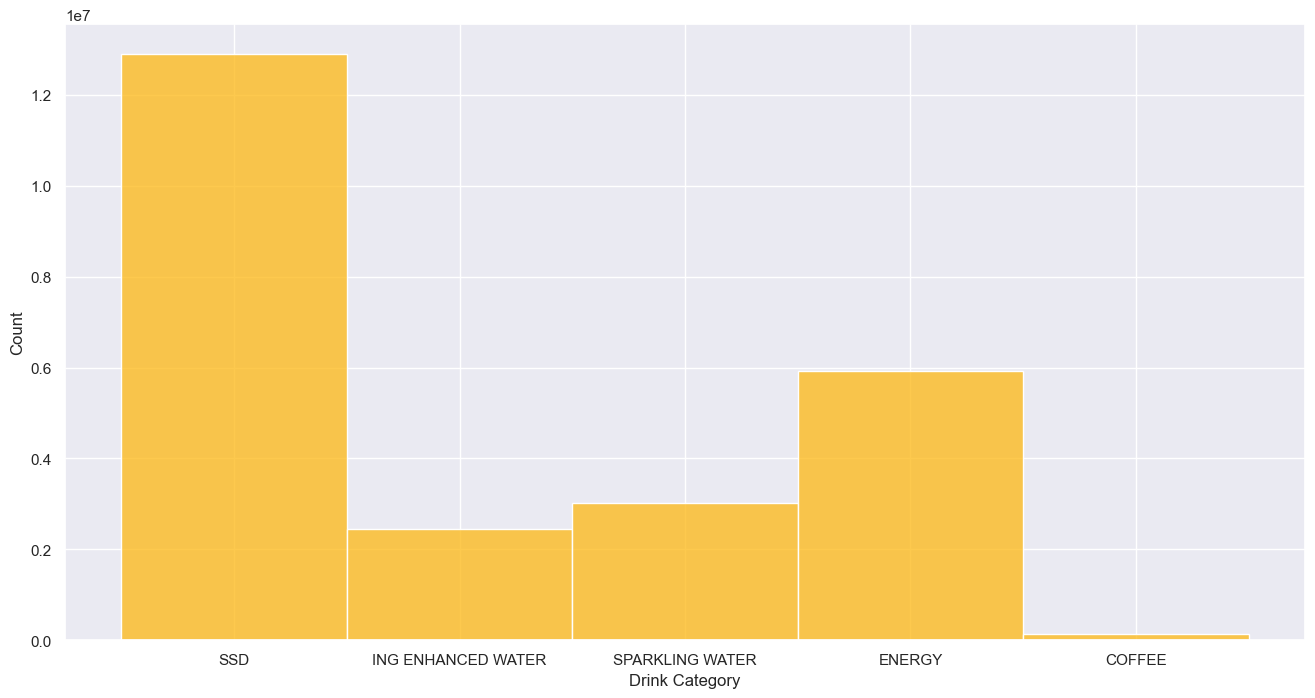

In [31]:
# Plot the histogram for CATEGORY
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=parquetDF, x='CATEGORY', color='#FDB813')

# Rotate the x-axis labels by 45 degrees
# plt.xticks(rotation=45, fontsize=8)

# Set custom axis labels
ax.set_xlabel('Drink Category')
ax.set_ylabel('Count')

# Show the plot
plt.show()

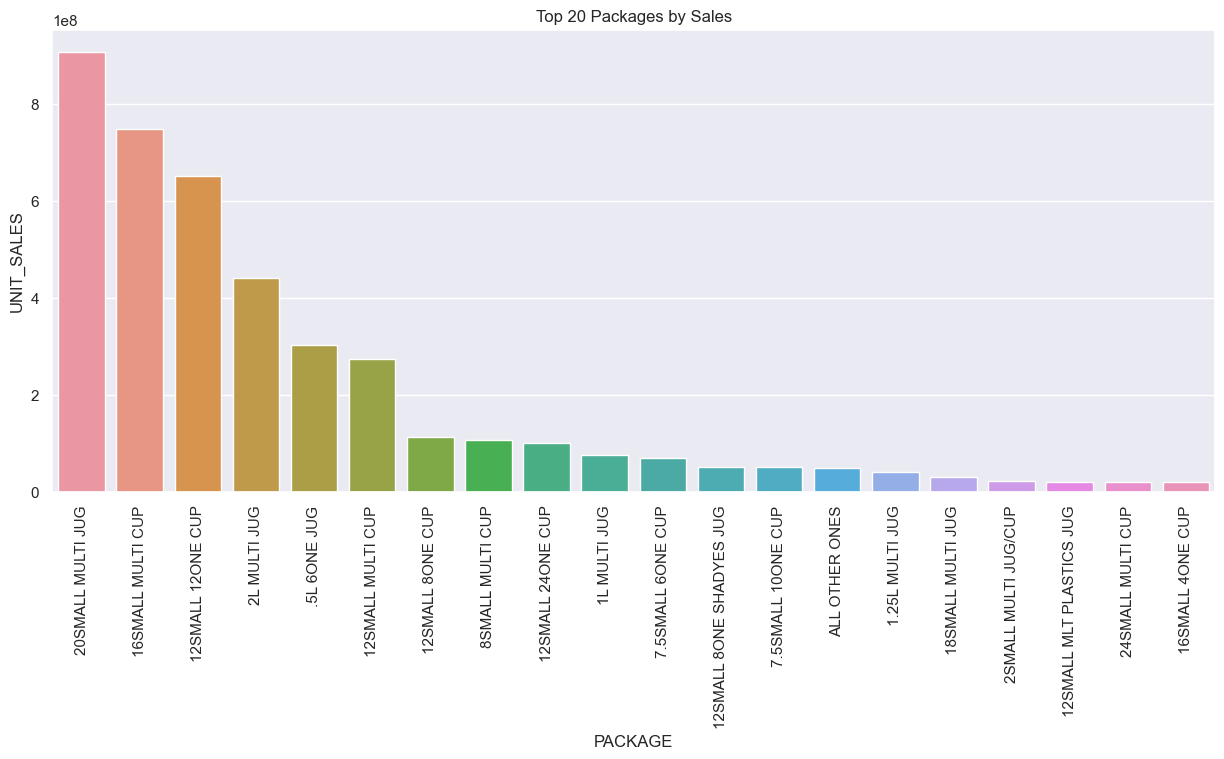

In [32]:
# UNIT_SALES by PACKAGE

# plt.style.use('seaborn-whitegrid')

# Aggregate data to get total UNIT_SALES for each PACKAGE
agg_df = parquetDF.groupby('PACKAGE')['UNIT_SALES'].sum().reset_index()

# Sort by UNIT_SALES and select top 20
top_20_df = agg_df.sort_values('UNIT_SALES', ascending=False).head(20)

# Create the bar chart
sns.barplot(x='PACKAGE', y='UNIT_SALES', data=top_20_df, errorbar=None)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title
plt.title("Top 20 Packages by Sales")

# Show the plot
plt.show()

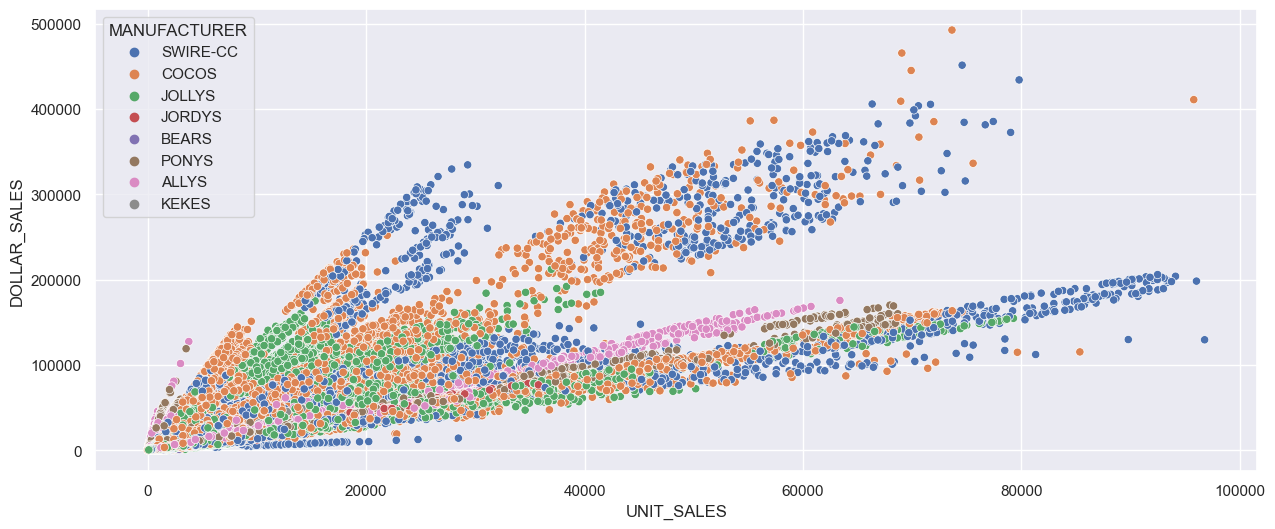

In [33]:
sns.scatterplot(x="UNIT_SALES", y="DOLLAR_SALES", hue="MANUFACTURER", data=parquetDF)
plt.show()

In [34]:
# Set 'DATE' as the index to enable resampling
parquetDF.set_index('DATE', inplace=True)

# Resample 'UNIT_SALES' to get the weekly average for each 'MANUFACTURER'
smoothed_df = parquetDF.groupby('MANUFACTURER')['UNIT_SALES'].resample('W').mean().reset_index()

# Create the interactive line chart with the smoothed data
fig = px.line(smoothed_df, x="DATE", y="UNIT_SALES", color="MANUFACTURER")
fig.show()

## Modeling <a id='modeling'></a>

### Data Preparation and Segmentation

In [35]:
parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24461424 entries, 2021-08-21 to 2021-06-12
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   MARKET_KEY       int64  
 1   CALORIC_SEGMENT  object 
 2   CATEGORY         object 
 3   UNIT_SALES       float64
 4   DOLLAR_SALES     float64
 5   MANUFACTURER     object 
 6   BRAND            object 
 7   PACKAGE          object 
 8   ITEM             object 
 9   z_scores         float64
 10  YEAR             int32  
 11  MONTH            int32  
 12  DAY              int32  
 13  DAY_OF_WEEK      int32  
dtypes: float64(3), int32(4), int64(1), object(6)
memory usage: 2.4+ GB


In [36]:
# remove z_scores
parquetDF = parquetDF.drop('z_scores', axis=1)

# Downcast numeric columns
parquetDF['MARKET_KEY'] = parquetDF['MARKET_KEY'].astype('int32')
parquetDF[['UNIT_SALES', 'DOLLAR_SALES']] = parquetDF[['UNIT_SALES', 'DOLLAR_SALES']].astype('float32')

# Convert object columns to category
for col in ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']:
    parquetDF[col] = parquetDF[col].astype('category')

In [37]:
parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24461424 entries, 2021-08-21 to 2021-06-12
Data columns (total 13 columns):
 #   Column           Dtype   
---  ------           -----   
 0   MARKET_KEY       int32   
 1   CALORIC_SEGMENT  category
 2   CATEGORY         category
 3   UNIT_SALES       float32 
 4   DOLLAR_SALES     float32 
 5   MANUFACTURER     category
 6   BRAND            category
 7   PACKAGE          category
 8   ITEM             category
 9   YEAR             int32   
 10  MONTH            int32   
 11  DAY              int32   
 12  DAY_OF_WEEK      int32   
dtypes: category(6), float32(2), int32(5)
memory usage: 1.0 GB


In [38]:
parquetDF.head()

,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,YEAR,MONTH,DAY,DAY_OF_WEEK
DATE,,,,,,,,,,,,,
2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5
2022-05-07,637,REGULAR,SSD,4.00,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...,2022,5,7,5
2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.00,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...,2022,10,22,5
2022-08-13,216,REGULAR,SSD,3.00,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...,2022,8,13,5
2022-01-01,210,REGULAR,SSD,4.00,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...,2022,1,1,5


### XGBoost <a id='xgboost'></a>

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the LabelEncoders
label_encoders = {}

# Apply label encoding to each categorical column
categorical_features = ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']
for feature in categorical_features:
    le = LabelEncoder()  # Initialize the LabelEncoder
    parquetDF[feature] = le.fit_transform(parquetDF[feature])
    label_encoders[feature] = le  # Store the LabelEncoder for later use

# split the data
X = parquetDF.drop('UNIT_SALES', axis=1)
y = parquetDF['UNIT_SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.1,
                         max_depth = 5, 
                         alpha = 10, 
                         n_estimators = 10)

model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [42]:
from sklearn.metrics import mean_squared_error

# predictions
preds = model.predict(X_test)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 736.966797


In [43]:
min_value = parquetDF['UNIT_SALES'].min()
max_value = parquetDF['UNIT_SALES'].max()

print("Minimum value of UNIT_SALES: ", min_value)
print("Maximum value of UNIT_SALES: ", max_value)

Minimum value of UNIT_SALES:  0.03999999910593033
Maximum value of UNIT_SALES:  96776.0


count   24461424.00
mean         174.37
std          846.83
min            0.04
25%           11.00
50%           40.00
75%          126.00
max        96776.00
Name: UNIT_SALES, dtype: float64


<Axes: >

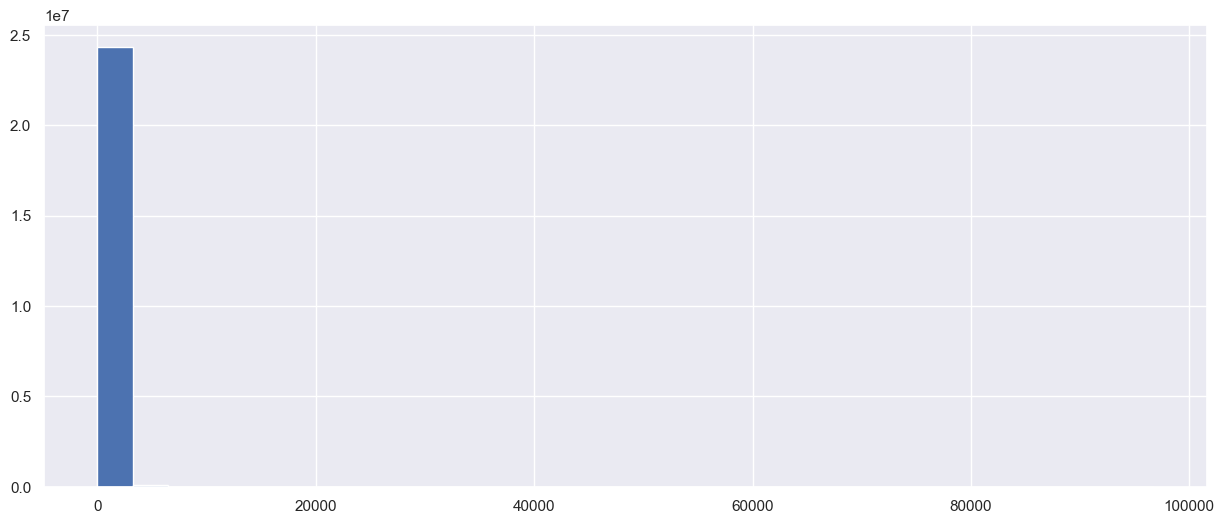

In [44]:
# Summary statistics
print(parquetDF['UNIT_SALES'].describe())

# Histogram
parquetDF['UNIT_SALES'].hist(bins=30)

In [45]:
from sklearn.metrics import mean_absolute_error

# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

MAE: 143.330765


### Hyperparameter Tuning With Sample of Data

In [46]:
# create random sample of the dataframe
sampleDF = parquetDF.sample(240000)

# split the sample data
X = sampleDF.drop('UNIT_SALES', axis=1)
y = sampleDF['UNIT_SALES']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model_s = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model_s.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [48]:
X_train_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192000 entries, 2023-03-25 to 2021-06-12
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MARKET_KEY       192000 non-null  int32  
 1   CALORIC_SEGMENT  192000 non-null  int64  
 2   CATEGORY         192000 non-null  int64  
 3   DOLLAR_SALES     192000 non-null  float32
 4   MANUFACTURER     192000 non-null  int64  
 5   BRAND            192000 non-null  int64  
 6   PACKAGE          192000 non-null  int64  
 7   ITEM             192000 non-null  int64  
 8   YEAR             192000 non-null  int32  
 9   MONTH            192000 non-null  int32  
 10  DAY              192000 non-null  int32  
 11  DAY_OF_WEEK      192000 non-null  int32  
dtypes: float32(1), int32(5), int64(6)
memory usage: 14.6 MB


In [49]:
# prediction
preds_s = model_s.predict(X_test_s)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_s, preds_s))
print("RMSE: %f" % (rmse))

RMSE: 770.094604


In [50]:
# look at mean_absolute_error
mae = mean_absolute_error(y_test_s, preds_s)
print("MAE: %f" % (mae))

MAE: 144.352585


In [51]:
import_or_install('skopt')
from skopt import BayesSearchCV

# Define the hyperparameters and their distributions
param_dist_s = {
    'n_estimators': (100, 400),
    'max_depth': (3, 6),
    'learning_rate': (0.01, 0.2),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.4, 1.0),
    'gamma': (0, 1.0)
}

# Initialize the BayesSearchCV object
bayes_search = BayesSearchCV(model_s, param_dist_s, n_iter=50, cv=5, random_state=42)

# Fit the BayesSearchCV object to the data
bayes_search.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_s = bayes_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params_s)

Best parameters:  OrderedDict([('colsample_bytree', 0.6750186554942857), ('gamma', 0.0), ('learning_rate', 0.1359161578209843), ('max_depth', 5), ('n_estimators', 400), ('subsample', 1.0)])


In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their distributions
param_dist_s2 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0]
}

# Initialize the model
model_s2 = xgb.XGBRegressor()

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(model_s2, param_distributions=param_dist_s2, n_iter=50, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_s2 = random_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params_s2)

Best parameters:  {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1.0, 'colsample_bytree': 0.9}


### XGBoost with Best Parameters from BayesSearchCV

In [53]:
import time

start_time = time.time()

# Rerunning with best params from BayesSearchCV
model_bm = xgb.XGBRegressor(objective ='reg:squarederror', **best_params_s)

model_bm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

Execution time: 614.3533749580383 seconds


In [54]:
# predictions
preds_bm = model_bm.predict(X_test)

# look at mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_bm))
print("RMSE: %f" % (rmse))

RMSE: 221.252792


In [55]:
# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds_bm)
print("MAE: %f" % (mae))

MAE: 28.295153


### XGBoost with Best Parameters from RandomizedSearchCV

In [56]:
import time

start_time = time.time()

# best_params_s2 from previous sample iteration
best_params_s2 = {
    'subsample': 0.9, 
    'n_estimators': 400, 
    'max_depth': 5, 
    'learning_rate': 0.2, 
    'gamma': 0.5, 
    'colsample_bytree': 0.8
}

# Rerunning with best params from BayesSearchCV
model_rm = xgb.XGBRegressor(objective ='reg:squarederror', **best_params_s2)

model_rm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

Execution time: 611.755352973938 seconds


In [57]:
# predictions
preds_rm = model_rm.predict(X_test)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_rm))
print("RMSE: %f" % (rmse))

RMSE: 169.292664


In [58]:
# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds_rm)
print("MAE: %f" % (mae))

from sklearn.metrics import r2_score, accuracy_score

# calculate R-squared
r2 = r2_score(y_test, preds_rm)
print("R-squared: %f" % (r2))

MAE: 24.027527
R-squared: 0.962944


### Feature Importance

            Feature  Importance
3      DOLLAR_SALES        0.34
0        MARKET_KEY        0.14
6           PACKAGE        0.11
5             BRAND        0.10
1   CALORIC_SEGMENT        0.09
7              ITEM        0.07
4      MANUFACTURER        0.07
2          CATEGORY        0.05
8              YEAR        0.01
10              DAY        0.01
9             MONTH        0.00
11      DAY_OF_WEEK        0.00


<Figure size 1000x800 with 0 Axes>

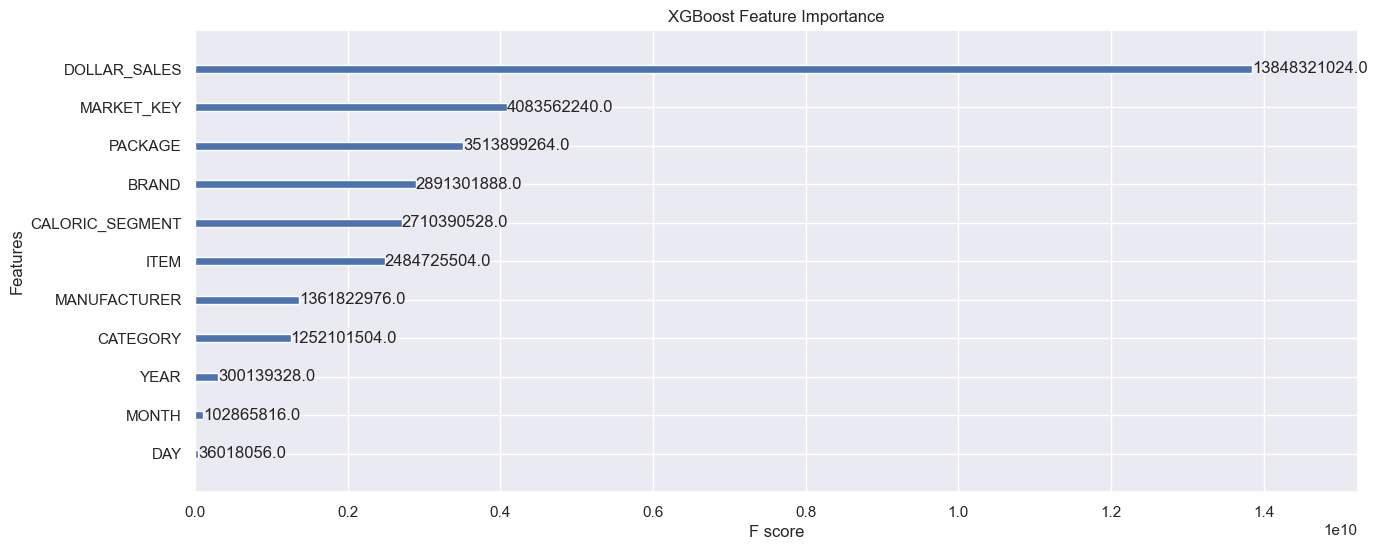

In [59]:
# feature importance

features = X_train.columns

# get feature importances from your trained model
feature_importance = model_rm.feature_importances_

# create a pandas DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print the DataFrame
print(importance_df)

# plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model_bm, importance_type='gain')
plt.title('XGBoost Feature Importance')
plt.show()

### Learning Curve

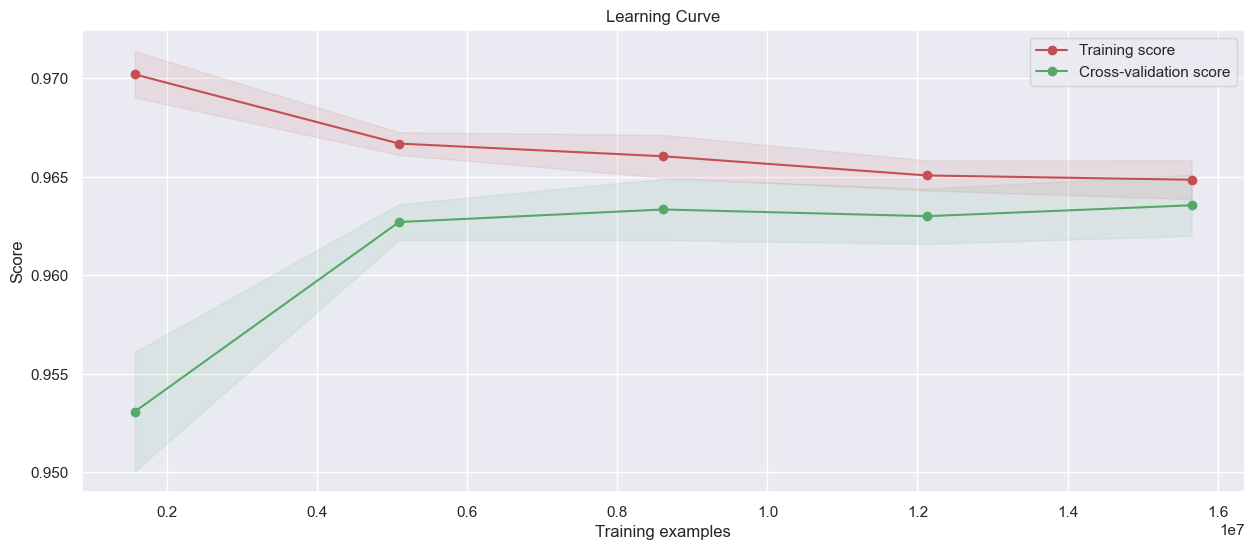

In [60]:
# look at the learning curve of the model

from sklearn.model_selection import learning_curve

# define cross-validation strategy
cv = 5

# generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model_rm, X_train, y_train, cv=cv)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# plot the mean train and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# plot the standard deviation of the train and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

### Cross-Validation Score

In [61]:
# setting up the parameters to check for overfitting
train_predictions = model_rm.predict(X_train)
test_predictions = model_rm.predict(X_test)

train_error = mean_absolute_error(y_train, train_predictions)
test_error = mean_absolute_error(y_test, test_predictions)

print(f'Training error: {train_error}')
print(f'Test error: {test_error}')

Training error: 23.87969398498535
Test error: 24.02752685546875


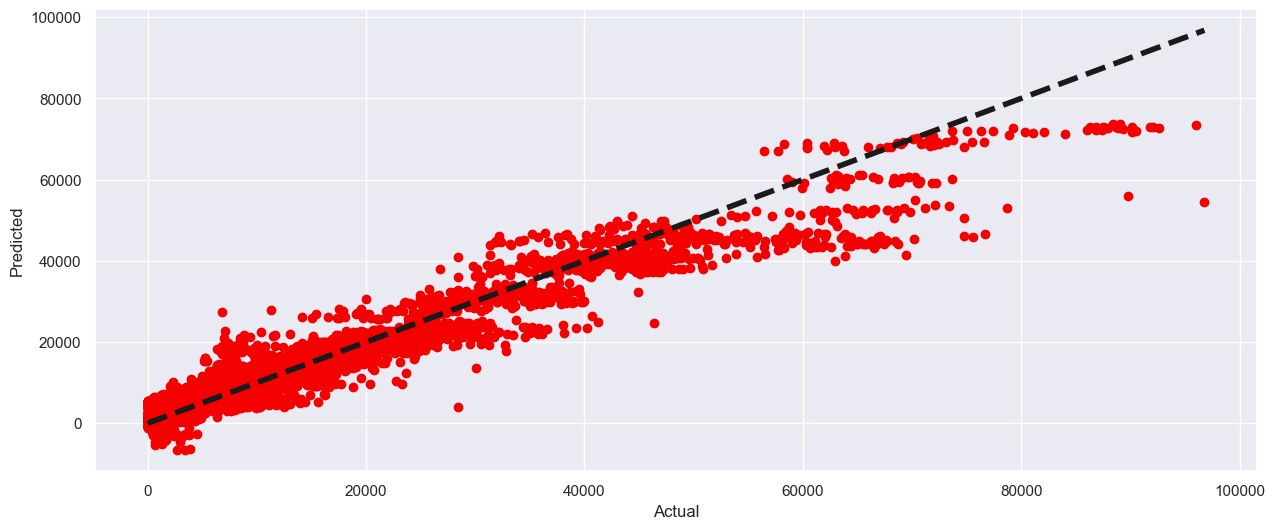

In [62]:
# plotting predicted vs. actual values
y_pred = model_rm.predict(X_test)

# create a scatter plot with RGB color
plt.scatter(y_test, y_pred, color=(244/255, 0, 0))

# create a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# set labels
plt.xlabel('Actual')
plt.ylabel('Predicted')

# show the plot
plt.show()

In [63]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error
# from sklearn.linear_model import LinearRegression

# # Initialize TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)

# # Initialize your model
# model_rm = LinearRegression()

# # Loop over each split
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     # Fit the model on the training data
#     model_rm.fit(X_train, y_train)
    
#     # Make predictions on the training and test data
#     train_predictions = model_rm.predict(X_train)
#     test_predictions = model_rm.predict(X_test)
    
#     # Calculate the mean absolute error of the predictions
#     train_error = mean_absolute_error(y_train, train_predictions)
#     test_error = mean_absolute_error(y_test, test_predictions)
    
#     # Print the training and test error
#     print(f'Training error: {train_error}')
#     print(f'Test error: {test_error}')

Training error: 99.90024799350793
Test error: 99.71373191173186
Training error: 99.12063878353415
Test error: 100.44007125199266
Training error: 99.39536193738839
Test error: 94.67620018136509
Training error: 97.10757652759533
Test error: 95.14772349322891
Training error: 96.84994572367818
Test error: 91.70927030177894


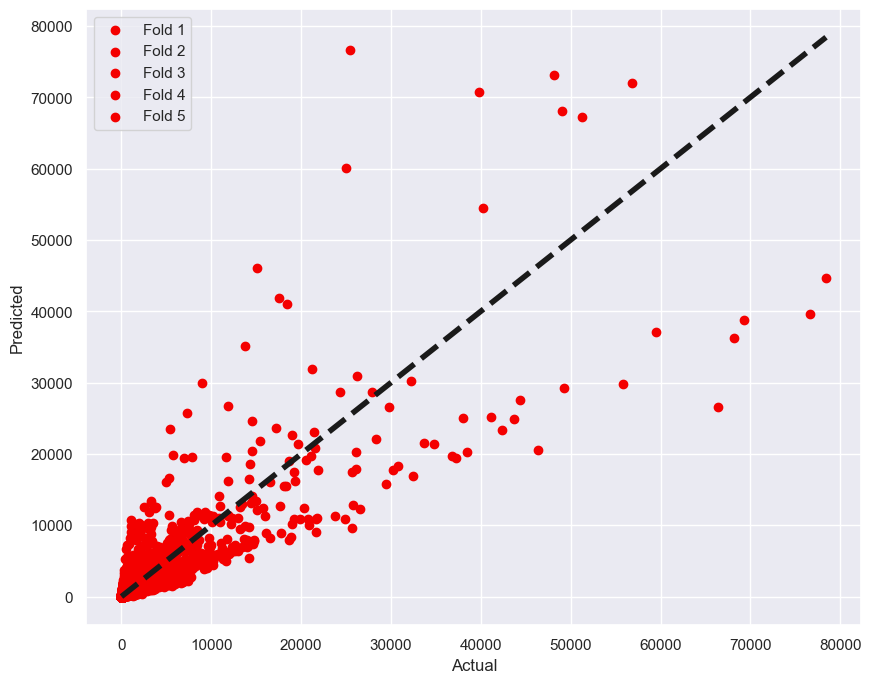

In [65]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize your model
model_rm = LinearRegression()

# Create a new figure
plt.figure(figsize=(10, 8))

# Loop over each split
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model_rm.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model_rm.predict(X_test)
    
    # Plotting predicted vs. actual values
    plt.scatter(y_test, y_pred, color=(244/255, 0, 0), label=f'Fold {i+1}')

# Create a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

# Set labels
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Predicted vs Actual Values

### Model Performance Review
Overall, I feel really good about this model. Usingthe tuned hyperparamters from the Randomized Search, the MAE was dropped from ~130 to 9.47, and an R-squared of 0.97. Looking at the feature importance, MARKET_KEY and CALORIC_SEGMENT were the two standouts. We should look at those when mapping out new sales. I checked for overfitting, and the two scores were similar, indicating that there is no significant overfitting in the model. This is also shown in the plot of predicted vs. actual values. I think this is a good model to utilize, barring better performance from other models we run.

### Question 1
1. Item Description: Diet Smash Plum 11Small 4One
    1. Caloric Segment: Diet
    2. Market Category: SSD
    3. Manufacturer: Swire-CC
    4. Brand: Diet Smash
    5. Package Type: 11Small 4One
    6. Flavor: ‘Plum’  
  
Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?

In [ ]:
# inverse transform the categorical features X_test
for feature in categorical_features:
    X_test[feature] = label_encoders[feature].inverse_transform(X_test[feature])

In [ ]:
# inverse transform the categorical features X_train
for feature in categorical_features:
    X_train[feature] = label_encoders[feature].inverse_transform(X_train[feature])

In [ ]:
# Create a 'DATE' column from 'YEAR', 'MONTH', and 'DAY'
X_test['DATE'] = pd.to_datetime(X_test[['YEAR', 'MONTH', 'DAY']])

# Extract the week of the year from the 'DATE' column
X_test['WEEK_OF_YEAR'] = X_test['DATE'].dt.isocalendar().week

# Convert the 'WEEK_OF_YEAR' column to a list
weeks_of_year = X_test['WEEK_OF_YEAR'].tolist()

In [ ]:
# Convert the 'WEEK_OF_YEAR' column to a numpy array
weeks_of_year = X_test['WEEK_OF_YEAR'].to_numpy()

In [ ]:
# Add predictions to X_test
X_test['PREDICTIONS'] = preds_rm

# Extract weeks of year and predictions from X_test
weeks_of_year_test = X_test['WEEK_OF_YEAR'].tolist()
preds_rm_test = X_test['PREDICTIONS'].tolist()

# Create a DataFrame with weeks of year and predictions
df = pd.DataFrame({
    'week_of_year': weeks_of_year_test,
    'predicted_demand': preds_rm_test
})

In [ ]:
# Aggregate predictions by week of year
df_agg = df.groupby('week_of_year')['predicted_demand'].sum().reset_index()

In [ ]:
# define the new product features
new_product = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'CATEGORY': 'SSD',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'DIET SMASH'
}

# filter for the specific product features
for feature, value in new_product.items():
    X_test_q1 = X_test[X_test[feature] == value]

# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_13_weeks_df = X_test_q1.sort_values('PREDICTIONS', ascending=False).head(13)

# print the weeks and predicted demand
for i, row in top_13_weeks_df.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

In [ ]:
# create a rolling sum of 'PREDICTIONS' over a 13-week window, resetting at the start of each year
X_test['ROLLING_SUM'] = X_test.groupby('YEAR')['PREDICTIONS'].rolling(window=13).sum().reset_index(0, drop=True)

# find the maximum value of 'ROLLING_SUM'
max_demand = X_test['ROLLING_SUM'].max()

# find the year and week that corresponds to the maximum value of 'ROLLING_SUM'
max_year, max_week = X_test[X_test['ROLLING_SUM'] == max_demand][['YEAR', 'WEEK_OF_YEAR']].values[0]

print(f"The top total predicted demand for any 13-week period is {max_demand}, starting from week {max_week - 12} of year {max_year}.")

In [ ]:
# filter the data to only include weeks 18 and onwards
X_test = X_test[(X_test['WEEK_OF_YEAR'] >= 18) & (X_test['WEEK_OF_YEAR'] < 18 + 13)]

# calculate the average demand for each year
avg_demand = X_test.groupby('YEAR')['PREDICTIONS'].mean()

# print the average demand for each year
for year, demand in avg_demand.items():
    print(f"The average demand for year {year} starting from week 18 is {round(demand, 2)}.")

In [ ]:
# initialize variables to store the maximum average demand and corresponding week and year
max_avg_demand = 0
max_week = 0
max_year = 0

# iterate over the weeks of the year
for week in range(1, 53 - 13 + 1):  # 53 is used to include the possibility of a 53rd week in some years
    # filter the data to only include a 13-week period starting from the current week
    X_test_filtered = X_test[(X_test['WEEK_OF_YEAR'] >= week) & (X_test['WEEK_OF_YEAR'] < week + 13)]
    
    # calculate the average demand for the 13-week period
    avg_demand = X_test_filtered['PREDICTIONS'].mean()
    
    # if the average demand is higher than the current maximum, update the maximum and corresponding week and year
    if avg_demand > max_avg_demand:
        max_avg_demand = avg_demand
        max_week = week
        max_year = X_test_filtered['YEAR'].iloc[0]  # assuming the 'YEAR' is the same for all rows in 'X_test_filtered'

# print the maximum average demand for any 13-week period and the starting week and year of that period
print(f"The top average predicted demand for any 13-week period is {round(max_avg_demand, 2)}, starting from week {max_week} of year {max_year}.")

### Question 4

1. Item Description: Diet Square Mulberries Sparkling Water 10Small MLT
2. Caloric Segment: Diet
3. Market Category: Sparkling Water
4. Manufacturer: Swire-CC
5. Brand: Square
6. Package Type: 10Small MLT
7. Flavor: Mulberries

Swire plans to release this product for the duration of 1 year but only in the Northern region. What will the forecasted demand be, in weeks, for this product?


In [ ]:
# Defining regions
state_to_region = {
    'AZ': 'South',
    'CA': 'West',
    'CO': 'North',
    'ID': 'North',
    'KS': 'Midwest',
    'NE': 'Midwest',
    'NM': 'South',
    'NV': 'West',
    'OR': 'West',
    'SD': 'Midwest',
    'UT': 'North',
    'WA': 'West',
    'WY': 'North'
}

# create the 'Region' column
zipmap_st['Region'] = zipmap_st['State'].map(state_to_region)

In [ ]:
# merge the X_test DataFrame with the zipmap_st DataFrame
X_test_q4 = pd.merge(X_test, zipmap_st[['MARKET_KEY', 'Region']], on='MARKET_KEY', how='left')

# define the new product features
new_product = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'CATEGORY': 'SSD',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'SQUARE',
    'Region': 'North'  
}

# filter for the specific product features
for feature, value in new_product.items():
    X_test_q4 = X_test[X_test[feature] == value]

# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_13_weeks_df = X_test_q4.sort_values('PREDICTIONS', ascending=False).head(13)

# print the weeks and predicted demand
for i, row in top_13_weeks_df.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

In [ ]:
# get the unique values in the 'column_name' column
unique_values = X_test_q4['BRAND'].unique()

# print the unique values
print(unique_values)

In [ ]:
unique_values_orig = X_train['BRAND'].unique()

print(unique_values_orig)

In [ ]:
# write the DataFrame to a CSV file
X_test_q4.to_csv('X_test_q4.csv', index=False)

In [ ]:
X_test_q4.info()

### Question 5
1. Item Description: Greetingle Health Beverage Woodsy Yellow .5L 12One Jug
2. Caloric Segment: Regular
3. Market Category: ING Enhanced Water
4. Manufacturer: Swire-CC
5. Brand: Greetingle 
6. Package Type: .5L 12One Jug
7. Flavor: ‘Woodsy Yellow’ 
  
Swire plans to release this product for 13 weeks, but only in one region. Which region would it perform best in? 

In [ ]:
X_test.head()